<a href="https://colab.research.google.com/github/CarlosHenriquePatrocinio/analise_de_dados_airbnb/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analista**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Nome:   Carlos Henrique do Patrocinio

Professor: Franciane Rodrigues, Douglas Ribeiro e Jonathas Carneiro

## **Pergunta de negócio**


Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

## **Sobre os dados**


Esse conjunto de dados oferece uma perspectiva dos valores praticados pelo Airbnb. Cada anúncio é avaliado com base em uma série de características, como tipos de quartos, classificações de limpeza e satisfação, quantidade de quartos, distância do centro da cidade e outros aspectos. O objetivo é obter um entendimento detalhado. Utilizando métodos de análise, examinamos e identificamos os fatores que exercem influência sobre os usuários do Airbnb.

Fonte:

https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

https://zenodo.org/record/4446043#.Y9Y9ENJBwUE

## **Legenda de Dados**

realSum: preço total  
room_type: tipo de quarto oferecido  
room_shared: se o quarto é compartilhado ou não   
room_private: se o quarto é privativo ou não   
person_capacity: número máximo de pessoas permitidas na propriedade  
host_is_superhost: se o host é ou não um superhost  
multi: tem vários quartos ou não   
biz: seja para uso comercial ou familiar  
cleanliness_rating: Classificação de limpeza  
guest_satisfaction_overall: satisfação geral do hóspede   
bedrooms: número de quartos  
dist: a distância do centro da cidade   
metro_dist: a distância da estação de metrô mais próxima   
lng: Longitude   
lat: Latitude   

## **Pacotes e bibliotecas utilizadas**

*  **gcsfs:** permite interagir com o Google Cloud Storage (GCS), um serviço de armazenamento de objetos do Google Cloud Platform. Com o gcsfs, você pode ler e gravar arquivos no GCS diretamente do seu código.

*  **pandera:** ela facilita a especificação e aplicação de regras de validação a estruturas de dados, como DataFrames do pandas. O pandera ajuda a verificar se os dados estão em conformidade com essas regras, identificando problemas de qualidade dos dados.

*  **panda:** popular para computação numérica, fornecendo suporte para matrizes multidimensionais, funções matemáticas avançadas e manipulação eficiente de dados numéricos

*  **numpy:** ele fornece suporte eficiente para arrays multidimensionais, juntamente com uma ampla variedade de funções matemáticas para manipulação desses arrays.

*  **os:**  fornece uma interface para interagir com o sistema operacional subjacente, permitindo que se execute várias operações relacionadas ao sistema, como manipulação de arquivos, acesso a variáveis de ambiente, execução de comandos do sistema, entre outros.

*  **matplotlib**: usada para criar visualizações estáticas, animadas e interativas

In [ ]:
!pip install gcsfs          # Instalação para poder acessar GCP
!pip install pandera        # Instalação da biblioteca Pandera

In [ ]:
# Abertura de bibliotecas
import os                           # Importar a biblioteca "os" para interagir com o sistema operacional
import pandas as pd                 # Importar a biblioteca "pandas" e atribuir um apelido "pd"
import numpy as np                  # O numpy é uma biblioteca popular para computação numérica em Python, fornecendo suporte para matrizes multidimensionais, funções matemáticas avançadas e manipulação eficiente de dados numéricos
import pandera as pa                # O pandera é uma biblioteca que adiciona recursos de validação de dados ao pandas, permitindo a definição de esquemas e regras para verificar a qualidade e integridade dos dados.
from google.cloud import storage    # Esse módulo fornece funcionalidades para interagir com o serviço de armazenamento em nuvem do Google Cloud Platform (GCP)

In [ ]:
# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configuração da quantidade de colunas para aparecer em um Datraframe
pd.set_option('display.max_columns',100)

## **Extração**

*  Google Drive
*  Google Cloud
*   **Tipos de separador:** Vírgula (,) - Ponto e vírgula (;) - Tabulação (\t) - Espaço em branco ( )
*   **Enconding:** UTF-8, ISO-8859-1, UTF-16, UTF-32, ASCII

### **Google Drive**

In [ ]:
from google.colab import drive      # Permite Acesso a sua GCP
drive.mount('/content/drive')       # Comando de abertura para Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Extração por Google Drive
# df = pd.read_csv('/content/drive/MyDrive/Airbnb/airbnb.csv',
#                 sep=',',
#                 encoding='ISO-8859-1',
#                 dayfirst = True)#

### **Google Cloud**

*   Documentação: https://cloud.google.com/docs/authentication?hl=pt-br

In [ ]:
# Configurando chave de degurança - ACESSO O PROJETO
serviceAccount = '/content/airbnb-392316-ad6af7722517.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('dadosair')                         # nome da bucket
bucket.blob('airbnb.csv')                                      # nome do arquivo
path = 'gs://dadosair/bruto/airbnb.csv'                        # gsutil

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path,
                 sep=';',
                 encoding='ISO-8859-1',
                 dayfirst = True)
dfback = df.copy()

## **Pré-Análise**

In [ ]:
# Visualização do dataframe
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,19.403.369.812.293.400,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022.963.798.088.290,2.539.380.002.594.490,7.869.037.927.190.310,4.166.707.868.490.740,9.825.389.587.009.930,6.846.472.824.200.010,490.569,5.241.772
1,1,3.442.457.760.176.220,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.4883892888289836,0.23940392283498632,6.311.763.782.503.960,33.421.208.615.275.400,8.372.807.567.422.690,5.834.292.774.344.900,490.005,52.374.320.000.000.000
2,2,2.641.014.224.451.050,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748.311.915.159.560,36.516.212.887.936.500,7.527.587.691.428.160,39.859.076.998.790.000,953.869.549.262.145,6.646.700.254.501.150,49.751.199.999.999.900,5.236.103
3,3,4.335.293.979.799.870,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.38486201282160204,0.4398760761319157,49.327.253.443.070.800,2.611.910.845.442.660,8.750.330.975.776.220,6.097.356.516.795.280,489.417,5.237.663
4,4,4.855.529.257.375.850,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.5447381834292384,0.31869264684168314,5.528.303.243.593.360,29.272.733.004.488.200,8.153.057.399.687.830,5.681.167.695.874.810,490.051,5.237.508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,24.861.153.422.538.800,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,237.583.262.303.917,14.360.537.205.353.700,18.119.835.516.460.200,9.594.573.303.721.590,22.530.420.286.686.800,15.699.521.005.716.000,485.869,5.237.677
1099,1099,23.363.719.447.894.400,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719.735.856.219.550,0.32226347097378233,10.802.488.011.198.600,5.719.989.179.364.610,13.477.527.677.253.700,9.391.335.189.570.040,483.611,523.491
1100,1100,3.170.623.110.632.010,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.5983545011776952,0.7519929810578154,44.047.651.522.583.700,23.323.524.157.065.500,6.259.475.624.336.220,436.169.267.144.573,488.897,5.237.798
1101,1101,18.128.559.042.017.200,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,19.430.198.987.229.700,0.38853210147464906,25.794.810.506.558.700,13.658.523.557.565.600,3.365.892.365.740.760,23.454.022.262.581.100,490.688,5.235.794


In [ ]:
# aparecer as 5 primeiras linhas do dataframe
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,19.403.369.812.293.400,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022.963.798.088.290,2.539.380.002.594.490,7.869.037.927.190.310,4.166.707.868.490.740,9.825.389.587.009.930,6.846.472.824.200.010,490.569,5.241.772
1,1,3.442.457.760.176.220,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.4883892888289836,0.23940392283498632,6.311.763.782.503.960,33.421.208.615.275.400,8.372.807.567.422.690,5.834.292.774.344.900,490.005,52.374.320.000.000.000
2,2,2.641.014.224.451.050,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748.311.915.159.560,36.516.212.887.936.500,7.527.587.691.428.160,39.859.076.998.790.000,953.869.549.262.145,6.646.700.254.501.150,49.751.199.999.999.900,5.236.103
3,3,4.335.293.979.799.870,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.38486201282160204,0.4398760761319157,49.327.253.443.070.800,2.611.910.845.442.660,8.750.330.975.776.220,6.097.356.516.795.280,489.417,5.237.663
4,4,4.855.529.257.375.850,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.5447381834292384,0.31869264684168314,5.528.303.243.593.360,29.272.733.004.488.200,8.153.057.399.687.830,5.681.167.695.874.810,490.051,5.237.508


In [ ]:
# aparecer as 5 últimas linhas do dataframe
df.tail()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1098,1098,24.861.153.422.538.800,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,237.583.262.303.917,14.360.537.205.353.700,18.119.835.516.460.200,9.594.573.303.721.590,22.530.420.286.686.800,15.699.521.005.716.000,485.869,5.237.677
1099,1099,23.363.719.447.894.400,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719.735.856.219.550,0.32226347097378233,10.802.488.011.198.600,5.719.989.179.364.610,13.477.527.677.253.700,9.391.335.189.570.040,483.611,523.491
1100,1100,3.170.623.110.632.010,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.5983545011776952,0.7519929810578154,44.047.651.522.583.700,23.323.524.157.065.500,6.259.475.624.336.220,436.169.267.144.573,488.897,5.237.798
1101,1101,18.128.559.042.017.200,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,19.430.198.987.229.700,0.38853210147464906,25.794.810.506.558.700,13.658.523.557.565.600,3.365.892.365.740.760,23.454.022.262.581.100,490.688,5.235.794
1102,1102,25.800.857.685.187.300,Shared room,True,False,2.0,False,0,0,8.0,90.0,1,0.2802043670336476,0.5162171303782599,533.962.652.799.512,2.827.367.725.871.820,8.074.923.072.437.510,5.626.722.572.511.590,489.295,5.237.575


In [ ]:
# aparece nome das colunas e tipos de dados
df.dtypes

Unnamed: 0                      int64
realSum                        object
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                           object
metro_dist                     object
attr_index                     object
attr_index_norm                object
rest_index                     object
rest_index_norm                object
lng                            object
lat                            object
dtype: object

In [ ]:
# Informações detalhadas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   object 
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   object 
 13  metro_dist                  1103 

In [ ]:
# Backup local do df
dfback = df.copy()

## **Transformação**

In [ ]:
# Visualizar informações numéricas com duas casas decimais
pd.set_option('display.precision', 2)

In [ ]:
# Visualizar dataframe
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,19.403.369.812.293.400,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022.963.798.088.290,2.539.380.002.594.490,7.869.037.927.190.310,4.166.707.868.490.740,9.825.389.587.009.930,6.846.472.824.200.010,490.569,5.241.772
1,1,3.442.457.760.176.220,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.4883892888289836,0.23940392283498632,6.311.763.782.503.960,33.421.208.615.275.400,8.372.807.567.422.690,5.834.292.774.344.900,490.005,52.374.320.000.000.000
2,2,2.641.014.224.451.050,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748.311.915.159.560,36.516.212.887.936.500,7.527.587.691.428.160,39.859.076.998.790.000,953.869.549.262.145,6.646.700.254.501.150,49.751.199.999.999.900,5.236.103
3,3,4.335.293.979.799.870,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.38486201282160204,0.4398760761319157,49.327.253.443.070.800,2.611.910.845.442.660,8.750.330.975.776.220,6.097.356.516.795.280,489.417,5.237.663
4,4,4.855.529.257.375.850,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.5447381834292384,0.31869264684168314,5.528.303.243.593.360,29.272.733.004.488.200,8.153.057.399.687.830,5.681.167.695.874.810,490.051,5.237.508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,24.861.153.422.538.800,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,237.583.262.303.917,14.360.537.205.353.700,18.119.835.516.460.200,9.594.573.303.721.590,22.530.420.286.686.800,15.699.521.005.716.000,485.869,5.237.677
1099,1099,23.363.719.447.894.400,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719.735.856.219.550,0.32226347097378233,10.802.488.011.198.600,5.719.989.179.364.610,13.477.527.677.253.700,9.391.335.189.570.040,483.611,523.491
1100,1100,3.170.623.110.632.010,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.5983545011776952,0.7519929810578154,44.047.651.522.583.700,23.323.524.157.065.500,6.259.475.624.336.220,436.169.267.144.573,488.897,5.237.798
1101,1101,18.128.559.042.017.200,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,19.430.198.987.229.700,0.38853210147464906,25.794.810.506.558.700,13.658.523.557.565.600,3.365.892.365.740.760,23.454.022.262.581.100,490.688,5.235.794


In [ ]:
# Retirada de colunas com problemas e/ou não utilizadas na analise
df.drop(['multi',
         'biz',
         'bedrooms',
         'attr_index',
         'attr_index_norm',
         'rest_index',
         'rest_index_norm'],axis=1,inplace=True)

In [ ]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['room_type'])))

['Entire home/apt', 'Private room', 'Shared room']


In [ ]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['guest_satisfaction_overall'])))

[20.0, 47.0, 60.0, 65.0, 70.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [ ]:
# Backup local do df
dfback = df.copy()

In [ ]:
# Renomeando colunas
df.rename(columns={'realSum':'valor',
                   'room_type':'tipo_quarto',
                   'room_shared':'quarto_compartilhado',
                   'room_private':'quarto_privativo',
                   'person_capacity': 'capacidade_máxima',
                   'host_is_superhost': 'superhost',
                   'cleanliness_rating':'limpeza',
                   'guest_satisfaction_overall':'satisfação',
                   'dist':'distância',
                   'metro_dist':'metro',
                   'lng':'longitude',
                   'lat':'latitude'
                   },inplace=True)

In [ ]:
# Criando um dicionario para traduzir as outras informações dessa coluna
traducao_tipo_quarto = {
    'Entire home/apt': 'apt/casa inteira',
    'Shared room': 'quarto compartilhado',
    'Private room': 'quarto privado'
}

In [ ]:
# Usando metodo replace para traduzir os termos da coluna 'tipo_quarto'
df['tipo_quarto'].replace(traducao_tipo_quarto,inplace=True)

In [ ]:
# Verificando os valores da coluna para checar que foi devidamente traduzido
df['tipo_quarto'].unique()

array(['quarto privado', 'apt/casa inteira', 'quarto compartilhado'],
      dtype=object)

In [ ]:
# Trocando o tipo da colunas
df['capacidade_máxima'] = df['capacidade_máxima'].astype(int)
df['limpeza'] = df['limpeza'].astype(int)
df['satisfação'] = df['satisfação'].astype(int)

In [ ]:
# Verificando se o tipo foi alterado corretamente
df.dtypes

Unnamed: 0               int64
valor                   object
tipo_quarto             object
quarto_compartilhado      bool
quarto_privativo          bool
capacidade_máxima        int64
superhost                 bool
limpeza                  int64
satisfação               int64
distância               object
metro                   object
longitude               object
latitude                object
dtype: object

In [ ]:
# Criando um novo dataframe e escolhendo quais colunas do dataframe original quero trazer para esse novo dataframe
df_final = df[['valor',
               'tipo_quarto',
               'quarto_compartilhado',
               'quarto_privativo',
               'capacidade_máxima',
               'superhost',
               'limpeza',
               'satisfação',
               'distância',
               'metro',
               'longitude',
               'latitude']]

In [ ]:
# Exportação em uma pasta Google Drive
df.to_csv('/content/drive/MyDrive/Airbnb/airbnb_tratado.csv',index=False)

In [ ]:
# Exportação no Google Drive
df.to_csv('airbnb_tratado.csv', index=False)

In [ ]:
# Google Cloud
df.to_csv('gs://dadosair/tratado/airbnb_tratado.csv', index=False) # salva no bucket

## **Análises**

In [ ]:
# Abertura de biblioteca de visualização
import matplotlib.pyplot as plt

In [ ]:
# Método que tira a média de todos os valores da coluna satisfação
df_final['satisfação'].mean()

94.36264732547598

In [ ]:
# Método que tira a média de todos os valores da coluna limpeza
df_final['limpeza'].mean()

9.461468721668178

In [ ]:
# Filtro para mais de 90% de satisfação
ft_alta_satisfação = (df_final.satisfação >= 90)

In [ ]:
# Visualizar dataframe com mais de 90% de satisfação
df_final.loc[ft_alta_satisfação]

,valor,tipo_quarto,quarto_compartilhado,quarto_privativo,capacidade_máxima,superhost,limpeza,satisfação,distância,metro,longitude,latitude
0,19.403.369.812.293.400,quarto privado,False,True,2,False,10,93,5.022.963.798.088.290,2.539.380.002.594.490,490.569,5.241.772
3,4.335.293.979.799.870,quarto privado,False,True,4,False,9,90,0.38486201282160204,0.4398760761319157,489.417,5.237.663
4,4.855.529.257.375.850,quarto privado,False,True,2,True,10,98,0.5447381834292384,0.31869264684168314,490.051,5.237.508
5,552.808.567.478.265,quarto privado,False,True,3,False,8,100,213.142.008.057.136,1.904.668.241.410.840,487.699,5.238.966
6,21.512.431.748.412.300,quarto privado,False,True,2,False,10,94,18.810.915.643.710.700,0.7297467390303181,49.157,5.238.296
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,3.561.971.269.889.620,quarto privado,False,True,4,True,10,95,2.169.252.732.021.210,0.21211261890485403,491.118,5.235.718
1098,24.861.153.422.538.800,apt/casa inteira,False,False,2,False,10,100,237.583.262.303.917,14.360.537.205.353.700,485.869,5.237.677
1099,23.363.719.447.894.400,quarto privado,False,True,2,False,10,90,4.719.735.856.219.550,0.32226347097378233,483.611,523.491
1100,3.170.623.110.632.010,quarto privado,False,True,2,False,10,92,0.5983545011776952,0.7519929810578154,488.897,5.237.798


In [ ]:
# Filtro para satisfação entre 70% e 90%
ft_satisfacao_entre_70_e_90 = (df_final.satisfação >= 70) & (df_final.satisfação < 90)

In [ ]:
# Visualizar dataframe 70% e 90% de satisfação
df_final.loc[ft_satisfacao_entre_70_e_90]

,valor,tipo_quarto,quarto_compartilhado,quarto_privativo,capacidade_máxima,superhost,limpeza,satisfação,distância,metro,longitude,latitude
1,3.442.457.760.176.220,quarto privado,False,True,4,False,8,85,0.4883892888289836,0.23940392283498632,490.005,52.374.320.000.000.000
2,2.641.014.224.451.050,quarto privado,False,True,2,False,9,87,5.748.311.915.159.560,36.516.212.887.936.500,49.751.199.999.999.900,5.236.103
9,27.652.145.384.669.400,quarto privado,False,True,2,False,10,88,31.423.614.256.297.000,0.9244044386046626,4.876,52.347
12,6.756.028.402.034.070,apt/casa inteira,False,False,4,False,8,87,29.330.458.432.919.500,0.6280730466725806,488.934,5.234.697
30,5.246.877.416.633.460,apt/casa inteira,False,False,2,False,9,89,11.263.269.723.055.700,11.210.705.457.980.100,487.657,5.237.288
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1.673.189.135.987.620,quarto privado,False,True,2,False,8,87,4.867.732.453.035.810,157.850.546.355.438,495.376,523.964
1093,9.094.743.748.974.760,apt/casa inteira,False,False,4,False,8,86,21.359.193.328.965.100,0.25696527074130854,488.701,523.544
1095,3.786.937.876.408.970,apt/casa inteira,False,False,2,False,9,83,3.326.725.231.508.550,13.305.695.559.947.700,4.861.619.999.999.990,5.235.037
1096,2.950.343.308.415.150,quarto privado,False,True,2,False,8,86,4.880.430.260.803.860,0.8843372439152997,484.422,52.341.159.999.999.900


In [ ]:
# Filtro para menos de 70% de satisfação
ft_baixa_satisfação = (df_final.satisfação <= 70)

In [ ]:
# Visualizar dataframe para menos de 70% de satisfação
df_final.loc[ft_baixa_satisfação]

,valor,tipo_quarto,quarto_compartilhado,quarto_privativo,capacidade_máxima,superhost,limpeza,satisfação,distância,metro,longitude,latitude
544,2.762.871.136.315.700,quarto privado,False,True,2,False,6,70,2.432.694.452.645.900,0.7287260460188892,4.879.919.999.999.990,52.352.909.999.999.900
626,6.512.314.578.304.780,apt/casa inteira,False,False,4,False,6,65,17.688.966.597.852.000,15.851.594.458.807.000,48.825.400.000.000.000,5.238.776
627,528.437.185.105.336,quarto privado,False,True,2,False,4,47,3.809.662.558.015.440,0.4176824191237845,483.758,5.236.902
853,5.666.346.401.705.990,apt/casa inteira,False,False,4,False,6,60,1.871.275.968.182.010,19.337.091.159.122.500,487.089,52.383.140.000.000.000
857,3.786.937.876.408.970,quarto privado,False,True,2,False,10,60,0.5566559866387716,0.49784805053206965,489.269,5.237.823
901,23.363.719.447.894.400,quarto privado,False,True,2,False,6,20,8.145.036.770.815.980,0.6884091181209882,49.576.400.000.000.000,52.311.609.999.999.900
907,20.903.147.189.089.100,quarto privado,False,True,2,False,6,60,80.695.081.791.365,0.4333650387135371,4.951.919.999.999.990,5.231.028


In [ ]:
# Método para contar quantas vezes cada valor aparece na coluna 'tipo_quarto'
df_final['tipo_quarto'].value_counts()

quarto privado          559
apt/casa inteira        538
quarto compartilhado      6
Name: tipo_quarto, dtype: int64

In [ ]:
# Método para contar quantas vezes cada valor aparece na coluna 'quarto_compartilhado'
df_final['quarto_compartilhado'].value_counts()

False    1097
True        6
Name: quarto_compartilhado, dtype: int64

In [ ]:
# Método para contar quantas vezes cada valor aparece na coluna 'superhost'
df_final['superhost'].value_counts()

False    780
True     323
Name: superhost, dtype: int64

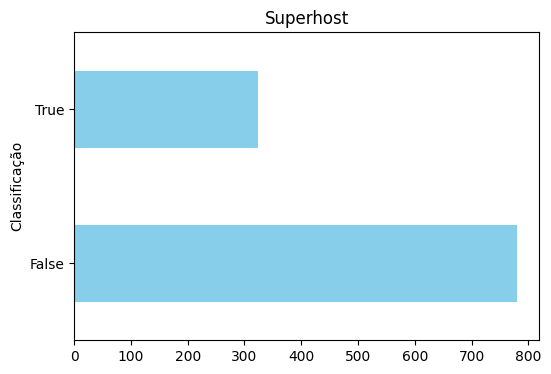

In [ ]:
# Gráfico de barras horizontal
df.groupby(['superhost']).size().plot.barh(figsize=(6,4), color=['skyblue'])
plt.ylabel('Classificação')
plt.title('Superhost')
plt.show()

In [ ]:
# Método para contar quantas vezes cada valor aparece em uma coluna 'quarto_privativo'
df_final['quarto_privativo'].value_counts()

True     559
False    544
Name: quarto_privativo, dtype: int64

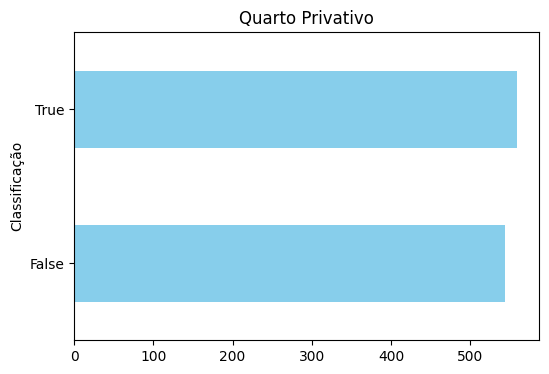

In [ ]:
# Gráfico de barras horizontal
df.groupby(['quarto_privativo']).size().plot.barh(figsize=(6,4), color=['skyblue'])
plt.ylabel('Classificação')
plt.title('Quarto Privativo')
plt.show()

In [ ]:
# Método para contar quantas vezes cada valor aparece em uma coluna 'capacidade_máxima'
df_final['capacidade_máxima'].value_counts()

2    656
4    333
3     79
6     24
5     11
Name: capacidade_máxima, dtype: int64

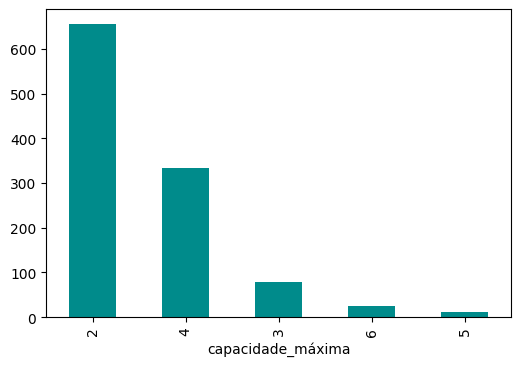

In [ ]:
# Gráfico de barras vertical
df.groupby('capacidade_máxima').size().sort_values(ascending=False).plot.bar(figsize=(6,4), color=['DarkCyan'])
plt.show()

In [ ]:
# Método para contar quantas vezes cada valor aparece em uma coluna
df_final['limpeza'].value_counts()

10    659
9     334
8      87
7      11
6       9
4       2
5       1
Name: limpeza, dtype: int64

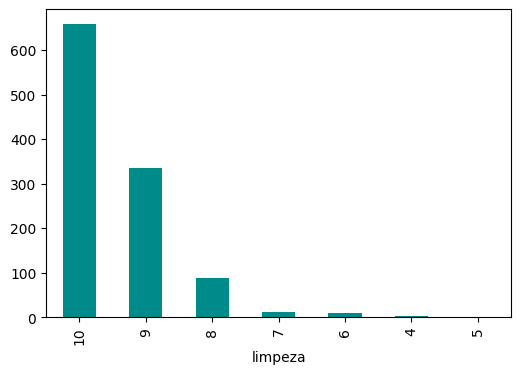

In [ ]:
# Gráfico de barras vertical
df.groupby('limpeza').size().sort_values(ascending=False).plot.bar(figsize=(6,4), color=['DarkCyan'])
plt.show()

## **Métodos descritivos**

* count = contagem de linhas
* mean  = média
* std   = desvio padrão
* 25%   = primeiro quartil
* 50%   = mediana
* 75%   = segundo quartil
* min   = valor mínimo
* max   = valor máximo

In [ ]:
# Método descritivo para todas as colunas do df
df_final.describe()

,capacidade_máxima,limpeza,satisfação
count,1103.00,1103.00,1103.00
mean,2.79,9.46,94.36
std,1.04,0.80,6.09
min,2.00,4.00,20.00
25%,2.00,9.00,92.00
50%,2.00,10.00,96.00
75%,4.00,10.00,98.00
max,6.00,10.00,100.00


## **Conclusão**

A análise de dados revelou o desempenho exemplar da empresa, cujo trabalho primoroso tem resultado em um índice de satisfação médio excedendo notavelmente a marca de 90%. Esse índice reflete a dedicação incansável em oferecer aos hóspedes uma experiência inigualável. Além disso, é digno de nota o elevado nível de excelência mantido na limpeza desses ambientes, que perpetua um padrão superior de qualidade em todas as instalações.

## **Considerações para futuras pesquisas**

Foi possível verificar que a maior parte (2/3) dos locadores não são superhost.
Para se qualificar a esse status, o dono do anúncio tem que atender aos seguintes critérios:
1. Concluir pelo menos 10 viagens ou 3 reservas que totalizem pelo menos 100 noites
2. Manter uma taxa de resposta de 90% ou mais
3. Manter uma taxa de cancelamento inferior a 1%, exceto em casos cobertos por nossa Política de Causas de Força Maior
4. Manter uma avaliação geral de 4,8 (uma avaliação é considerada para o status de Superhost quando o hóspede e o anfitrião enviarem uma avaliação ou quando o período de avaliação de 14 dias terminar, o que ocorrer primeiro).

O último requesito (4) não é empecilho, tendo em vista que que é praticamente nula a quantidade de locador abaixo desse índice.
Porém é necessário atentar-se aos requesitos 1, 2 e 3.
Alguns questionamentos podem ser colocados em pauta, como "Esses locadores estão respondendo as solicitações de locação?", "Estão ocorrendo muitos cancelamentos?"